# Prospecção de Dados (Data Mining) DI/FCUL - HA2

## Second Home Assignement (MC/DI/FCUL - 2024)

### Fill in the section below

### GROUP:`###`

* Element Name, Number - Hours worked on the project
* Element Name, Number - Hours worked on the project
* Element Name, Number - Hours worked on the project



## Objectives
The purpose of this Home Assignment is:

1. Analyze the itemset/rules generation procedure
2. Process and identify the most relevant rules

**NOTE 1: Students are not allowed to add more cells to the notebook**

**NOTE 2: The notebook must be submited fully executed**


### 1. Read the Dataset

Dataset: Instacart [Market Basket Analysis](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)



The purpose of this Home Assignment is:

1. Analyze the itemset/rules generation procedure
2. Identify the most relevant rules

Please download the HA files from this moodle folder and inspect it like this:
**NOTE 1: Students are not allowed to add more cells to the notebook**

**NOTE 2: The notebook must be submited fully executed**

The dataset has been preprocessed with transactions as lists of integers. It is necessary a decoder to see the actual products bought together

Uncompress the data set (zip file) which will produce 2 files:
* `order_products.pickle` a Python pickle with all the trasactions
* A `products.txt` - decoder table with all the data relative to each item



In [1]:
#Read product names and IDs
lines=open("products.txt", "rt", encoding="utf8").readlines()
products=[0]*len(lines)
for lin in lines[1:]:
    pid, pname, aid, did=lin.strip().split("\t")    
    products[int(pid)]=pname
    
#read transactions
import pickle
orders=pickle.load(open("order_products.pickle", "rb"))

#check names of products on transaction 2 (example):
print("Transaction 2 is", orders[2])
for prod in orders[2]: print("Code: %5d is product: %s" %(prod, products[prod]))

Transaction 2 is [33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668]
Code: 33120 is product: Organic Egg Whites
Code: 28985 is product: Michigan Organic Kale
Code:  9327 is product: Garlic Powder
Code: 45918 is product: Coconut Butter
Code: 30035 is product: Natural Sweetener
Code: 17794 is product: Carrots
Code: 40141 is product: Original Unflavored Gelatine Mix
Code:  1819 is product: All Natural No Stir Creamy Almond Butter
Code: 43668 is product: Classic Blend Cole Slaw


### Objective 1 - Analyze the itemset/rules generation procedure

1. From the approaches used in classes make a performance analysis up to a threshold level of support
2. Define a good support threshold for analysis according to your computational capabilities


In [2]:
### Add supporting functions here
lines = open("products.txt", "rt", encoding="utf8").readlines()
products = {}

# Extract product names and store them in a dictionary
for lin in lines[1:]:
    pid, pname, aid, did = lin.strip().split("\t")
    products[int(pid)] = pname

# Read transactions from the pickle file
import pickle
orders = pickle.load(open("order_products.pickle", "rb"))

# Create a new dictionary to store transactions with product names
orders_with_names = {}

# Replace product codes with product names in each transaction
for transaction_id, product_codes in orders.items():
    # Replace product codes with product names
    product_names = [products[code] for code in product_codes]
    # Store the transaction with product names in the new dictionary
    orders_with_names[transaction_id] = product_names
    
#Transfom the dictionary into a list   
orders_with_names_list = list(orders_with_names.values())

#Since the dataset is two big we did a random sample
import random
subset_size = 500000  
subset_orders_with_names_list = random.sample(orders_with_names_list, subset_size)

# Compute binary database (transactions X products)
import pandas as pd
from mlxtend.preprocessing import  TransactionEncoder
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(subset_orders_with_names_list).transform(subset_orders_with_names_list)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)

#Apriori, FP-Growth, and Eclat algorithms used for association rule mining in data mining 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from pyfim import pyeclat


import time

D={"threshold": [0.2, 0.1, 0.05, 0.02, 0.01], 
   "num_itemsets":[],
   "apriori":[], 
   "FP-growth":[], 
   "ECLAT":[]}


for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(binary_database, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_apriori.shape[0])
    D["apriori"].append(t1-t0)

    FI_fpg= fpgrowth(binary_database, min_supp)
    t2 = time.time()
    D["FP-growth"].append(t2-t1)

    FI_eclat= pyeclat(subset_orders_with_names_list, min_supp)    
    t3 = time.time()
    D["ECLAT"].append(t3-t2) 

df_performance=pd.DataFrame(D)


# Generate frequent itemsets
FI_fpg = fpgrowth(binary_database, 0.01, use_colnames=True)
FI_eclat = pyeclat(subset_orders_with_names_list, 0.01) 
FI_apriori = apriori(binary_database, 0.01, use_colnames=True)  

FI_fpg['Algorithm'] = 'FP-Growth'
FI_fpg['Support'] = 0.01
FI_eclat['Algorithm'] = 'ECLAT'
FI_eclat['Support'] = 0.01
FI_apriori['Algorithm'] = 'Apriori'  
FI_apriori['Support'] = 0.01

combined_df = pd.concat([FI_fpg, FI_eclat, FI_apriori])

combined_df.reset_index(drop=True, inplace=True)


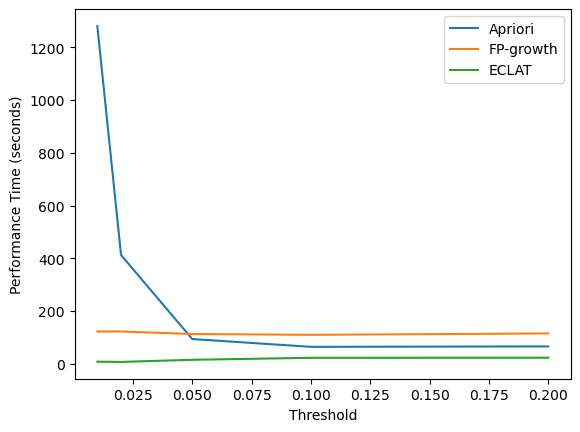

      support                                                           itemsets  Algorithm  Support
0    0.146578                                                           (Banana)  FP-Growth     0.01
1    0.021436                                                      (Half & Half)  FP-Growth     0.01
2    0.020762                                                        (Asparagus)  FP-Growth     0.01
3    0.020084                                           (Organic Tomato Cluster)  FP-Growth     0.01
4    0.118380                                           (Bag of Organic Bananas)  FP-Growth     0.01
5    0.055378                                                  (Organic Avocado)  FP-Growth     0.01
6    0.047716                                                      (Large Lemon)  FP-Growth     0.01
7    0.044328                                                     (Strawberries)  FP-Growth     0.01
8    0.023400                                       (Sparkling Water Grapefruit)  FP-Growth

,threshold,num_itemsets,apriori,FP-growth,ECLAT
0,0.20,0,66.091175,115.232233,23.265783
1,0.10,2,64.420615,109.936690,22.841126
2,0.05,6,93.977442,113.110343,15.283988
3,0.02,40,412.431872,122.687196,7.265821
4,0.01,118,1280.930979,122.462405,8.109892


In [3]:
### Add processing code here
#orders_with_names
#orders_with_names_list
#subset_orders_with_names_list
#binary_database


import matplotlib.pyplot as plt
plt.plot(df_performance["threshold"], df_performance["apriori"], label="Apriori")
plt.plot(df_performance["threshold"], df_performance["FP-growth"], label="FP-growth")
plt.plot(df_performance["threshold"], df_performance["ECLAT"], label="ECLAT")
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Performance Time (seconds)')
plt.show()



print(combined_df.to_string())

df_performance

### Your short analysis here

The threshold column represents the minimum support threshold used in association rule mining. As the threshold decreases, more itemsets are considered frequent.

The number of items column indicates the number of frequent itemsets generated by each algorithm at the corresponding threshold level. As expected, the number of itemsets generally increases as the threshold becomes less stringent, allowing for the inclusion of more itemsets in the analysis.

Apriori's runtime increases significantly as the threshold decreases. This behavior is expected as Apriori's performance is influenced by the number of candidate itemsets generated, which tends to increase with lower support thresholds.

FP-growth exhibits relatively consistent runtime across different threshold levels. This stability in runtime is one of the advantages of FP-growth over Apriori, as it does not rely on candidate generation and pruning steps.
 
ECLAT's runtime decreases as the threshold becomes less stringent, which is somewhat counterintuitive but not uncommon. This behavior suggests that ECLAT may be more efficient at processing data with lower support thresholds, possibly due to its vertical data format and depth-first search approach.

### Objective 2 - Identify the most relevant rules

1. From your predefined support level generate all available itemsets and generate rules
2. Identify a set of 10 relevant rules using the Highest Lift criterion
    * **NOTE**: Present the rules with the product names and not as Integers 
3. Identify the Maximal and Closed Itemsets for the same level of support and generate 5 rules using the Highest Lift
    * **NOTE**: Do not list the Maximal or Closed Itemsets. Present just a few as an example and mention **how many** Closed and Maximal Itemsets were found for the selected support level
    * **NOTE**: Present the rules with the product names and not as Integers 


In [4]:
### Add supporting functions here
from mlxtend.frequent_patterns import association_rules
from IPython.display import display, Markdown

FI_fpg = fpgrowth(binary_database, 0.01, use_colnames=True)
rules = association_rules(FI_fpg, metric="confidence",min_threshold=0)

# Sort the rules by lift in descending order
rules_sorted_by_lift = rules.sort_values(by='lift', ascending=False)
# Select the top 10 rules with the highest lift
top_10_rules = rules_sorted_by_lift.head(10)



In [5]:
### Add processing code here
display(Markdown('## 1. From your predefined support level generate all available itemsets and generate rules'))
display(Markdown('### Association Rules'))
display(rules)
display(Markdown('### Frequent Itemsets'))
display(FI_fpg)
display(Markdown('## 2.Identify a set of 10 relevant rules using the Highest Lift criterion'))
display(top_10_rules)

## 1. From your predefined support level generate all available itemsets and generate rules

### Association Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Avocado),(Banana),0.055378,0.146578,0.016378,0.295749,2.017692,0.008261,1.211815,0.533953
1,(Banana),(Organic Avocado),0.146578,0.055378,0.016378,0.111736,2.017692,0.008261,1.063447,0.591014
2,(Large Lemon),(Banana),0.047716,0.146578,0.012672,0.265571,1.811809,0.005678,1.162022,0.470517
3,(Banana),(Large Lemon),0.146578,0.047716,0.012672,0.086452,1.811809,0.005678,1.042402,0.525022
4,(Strawberries),(Banana),0.044328,0.146578,0.012918,0.291419,1.988146,0.006420,1.204409,0.520073
5,(Banana),(Strawberries),0.146578,0.044328,0.012918,0.088131,1.988146,0.006420,1.048036,0.582384
6,(Organic Baby Spinach),(Banana),0.074942,0.146578,0.015816,0.211043,1.439801,0.004831,1.081709,0.330206
7,(Banana),(Organic Baby Spinach),0.146578,0.074942,0.015816,0.107902,1.439801,0.004831,1.036946,0.357923
8,(Organic Baby Spinach),(Bag of Organic Bananas),0.074942,0.118380,0.015744,0.210082,1.774645,0.006872,1.116091,0.471870
9,(Bag of Organic Bananas),(Organic Baby Spinach),0.118380,0.074942,0.015744,0.132995,1.774645,0.006872,1.066959,0.495119


### Frequent Itemsets

,support,itemsets
0,0.146578,(Banana)
1,0.021436,(Half & Half)
2,0.020762,(Asparagus)
3,0.020084,(Organic Tomato Cluster)
4,0.118380,(Bag of Organic Bananas)
...,...,...
113,0.010086,"(Cucumber Kirby, Banana)"
114,0.017558,"(Organic Strawberries, Banana)"
115,0.019564,"(Organic Strawberries, Bag of Organic Bananas)"
116,0.010544,"(Organic Strawberries, Organic Raspberries)"


## 2.Identify a set of 10 relevant rules using the Highest Lift criterion

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Organic Strawberries),(Organic Raspberries),0.082842,0.042822,0.010544,0.127278,2.972267,0.006997,1.096774,0.723492
27,(Organic Raspberries),(Organic Strawberries),0.042822,0.082842,0.010544,0.246229,2.972267,0.006997,1.216759,0.693243
19,(Organic Fuji Apple),(Banana),0.027614,0.146578,0.010432,0.377779,2.577327,0.006384,1.371575,0.629381
18,(Banana),(Organic Fuji Apple),0.146578,0.027614,0.010432,0.071170,2.577327,0.006384,1.046894,0.717114
29,(Organic Raspberries),(Bag of Organic Bananas),0.042822,0.118380,0.012674,0.295969,2.500164,0.007605,1.252247,0.626870
28,(Bag of Organic Bananas),(Organic Raspberries),0.118380,0.042822,0.012674,0.107062,2.500164,0.007605,1.071942,0.680595
17,(Organic Hass Avocado),(Bag of Organic Bananas),0.066302,0.118380,0.019328,0.291515,2.462532,0.011479,1.244373,0.636088
16,(Bag of Organic Bananas),(Organic Hass Avocado),0.118380,0.066302,0.019328,0.163271,2.462532,0.011479,1.115890,0.673662
14,(Organic Strawberries),(Organic Hass Avocado),0.082842,0.066302,0.012770,0.154149,2.324950,0.007277,1.103856,0.621358
15,(Organic Hass Avocado),(Organic Strawberries),0.066302,0.082842,0.012770,0.192604,2.324950,0.007277,1.135945,0.610351


### Your short analysis here

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum
